<a href="https://colab.research.google.com/github/marvameraj/demo/blob/main/python_projects_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Model Performance:
MAE: 221.74
RMSE: 713.90
R2 Score: 0.14


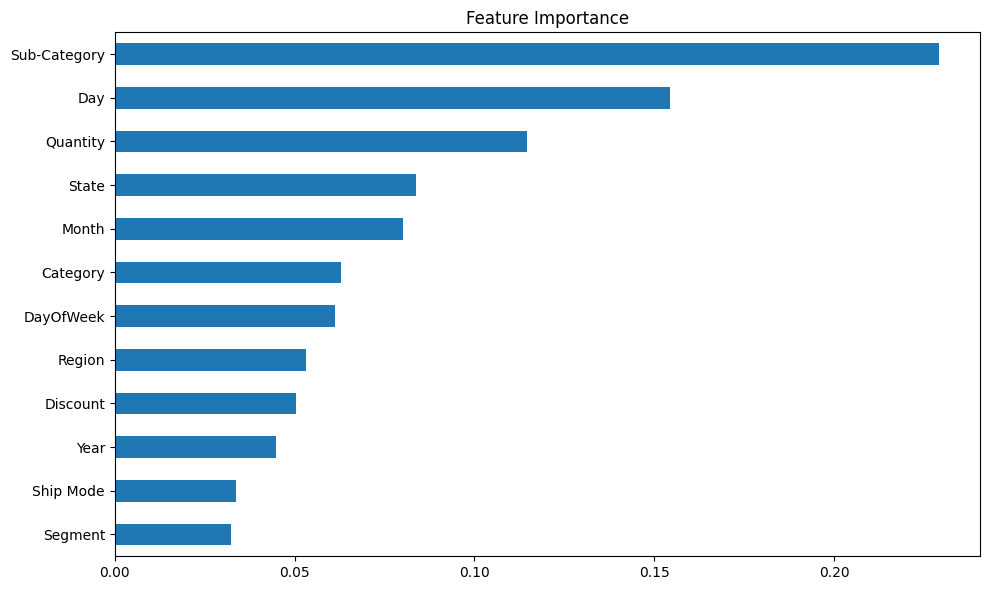

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "Sample - Superstore.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Parse dates
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Feature engineering
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek

# Label encoding for categorical features
cat_cols = ['Region', 'Category', 'Sub-Category', 'Segment', 'Ship Mode', 'State']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Region', 'Category',
            'Sub-Category', 'Segment', 'Ship Mode', 'State', 'Quantity', 'Discount']
X = df[features]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Optional: Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


2025-06-20 18:22:35.837 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:22:36.007 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-20 18:22:36.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:22:36.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:22:36.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:22:36.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:22:36.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 18:22:36.028 Thread 'MainThread': mi

DeltaGenerator()

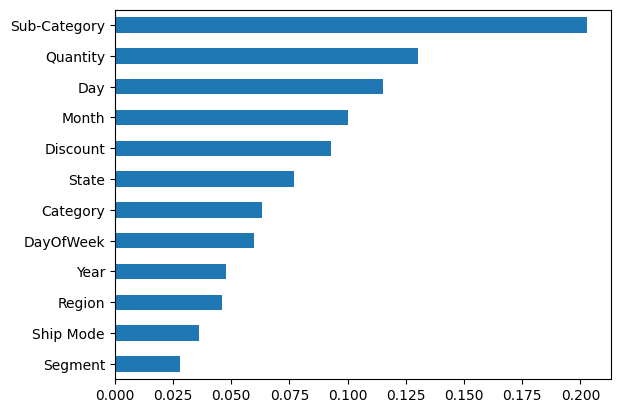

In [ ]:
# app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Feature engineering
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek

# Label encoding
cat_cols = ['Region', 'Category', 'Sub-Category', 'Segment', 'Ship Mode', 'State']
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Prepare model
features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Region', 'Category',
            'Sub-Category', 'Segment', 'Ship Mode', 'State', 'Quantity', 'Discount']
X = df[features]
y = df['Sales']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Streamlit UI
st.title("🛒 Sales Prediction System")
st.write("Predict future sales based on input parameters.")

# Sidebar inputs
with st.sidebar:
    st.header("Input Parameters")
    year = st.slider("Year", int(df['Year'].min()), int(df['Year'].max()), 2017)
    month = st.selectbox("Month", list(range(1, 13)))
    day = st.selectbox("Day", list(range(1, 32)))
    dow = st.selectbox("Day of Week (0=Mon)", list(range(7)))
    region = st.selectbox("Region", le_dict['Region'].classes_)
    category = st.selectbox("Category", le_dict['Category'].classes_)
    subcat = st.selectbox("Sub-Category", le_dict['Sub-Category'].classes_)
    segment = st.selectbox("Segment", le_dict['Segment'].classes_)
    ship_mode = st.selectbox("Ship Mode", le_dict['Ship Mode'].classes_)
    state = st.selectbox("State", le_dict['State'].classes_)
    quantity = st.slider("Quantity", 1, 10, 3)
    discount = st.slider("Discount", 0.0, 0.8, 0.1)

# Encode user inputs
input_data = pd.DataFrame([[
    year, month, day, dow,
    le_dict['Region'].transform([region])[0],
    le_dict['Category'].transform([category])[0],
    le_dict['Sub-Category'].transform([subcat])[0],
    le_dict['Segment'].transform([segment])[0],
    le_dict['Ship Mode'].transform([ship_mode])[0],
    le_dict['State'].transform([state])[0],
    quantity, discount
]], columns=features)

# Prediction
prediction = model.predict(input_data)[0]

st.success(f"💰 Predicted Sales: ${prediction:.2f}")

# Feature importance plot
st.subheader("📊 Feature Importance")
importances = pd.Series(model.feature_importances_, index=X.columns)
fig, ax = plt.subplots()
importances.sort_values().plot(kind='barh', ax=ax)
st.pyplot(fig)
